In [1]:
#to test if this functionality still works
print("Hello World")

Hello World


First we will mount the google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


Importing Necessary packages

In [3]:
import numpy as np                  # Implemennts milti-dimensional array and matrices
import pandas as pd                 # For data manipulation and analysis
import matplotlib.pyplot as plt     # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline

from subprocess import check_output

import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')

Importing the dataset

In [4]:
#telling the OS to change directories
import os
os.chdir('/content/drive/My Drive/Schroder\'s/')
#this file has all our functions
import schrodersmethods

In [5]:
try:
  dataset = pd.read_csv("SDRProject.csv")
except ValueError:
  print("file not found in directory")
dataset.head(2)

,Asset Class,Product Display Lens,Fund Strategy,Client Country,Client Type,Client Sub Type,Client Group,Channel,Vehicle,ESG,Quarter/Year (Asset Date),AUM,NetFlow
0,Equity,Equities Global ex US,Active,Canada,Asset manager & sub-advised,Asset manager & sub-advised,Wealth,AM & Sub-Advised,Undefined,No,1/1/2020,"$73,119,414.21","$378,803.84"
1,Equity,Equities Sectors & Themes,Active,Canada,Asset manager & sub-advised,Asset manager & sub-advised,Wealth,AM & Sub-Advised,Undefined,No,1/1/2020,"$284,554,520.81","$32,598,935.52"


In [6]:
print(f"This Dataset have {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

This Dataset have 153013 rows and 13 columns.


Data Profiling: Trying to understand our data

In [7]:
dataset.shape

(153013, 13)

In [8]:
dataset.columns

Index(['Asset Class', 'Product Display Lens', 'Fund Strategy',
       'Client Country', 'Client Type', 'Client Sub Type', 'Client Group',
       'Channel', 'Vehicle', 'ESG', 'Quarter/Year (Asset Date)', 'AUM',
       'NetFlow'],
      dtype='object')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153013 entries, 0 to 153012
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Asset Class                153013 non-null  object
 1   Product Display Lens       153013 non-null  object
 2   Fund Strategy              152853 non-null  object
 3   Client Country             153013 non-null  object
 4   Client Type                153013 non-null  object
 5   Client Sub Type            153013 non-null  object
 6   Client Group               153013 non-null  object
 7   Channel                    153013 non-null  object
 8   Vehicle                    153013 non-null  object
 9   ESG                        153013 non-null  object
 10  Quarter/Year (Asset Date)  153013 non-null  object
 11  AUM                        153013 non-null  object
 12  NetFlow                    153013 non-null  object
dtypes: object(13)
memory usage: 15.2+ MB


In [10]:
dataset.describe()

,Asset Class,Product Display Lens,Fund Strategy,Client Country,Client Type,Client Sub Type,Client Group,Channel,Vehicle,ESG,Quarter/Year (Asset Date),AUM,NetFlow
count,153013,153013,152853,153013,153013,153013,153013,153013,153013,153013,153013,153013,153013
unique,9,81,2,2,11,26,4,8,6,9,14,141652,127472
top,Equity,Equities US,Active,United States,DB pension fund,Institutional undefined,Pensions,Non-Profit,ETF,No,1/1/2023,$0.00,$0.00
freq,62824,13823,102866,119513,29922,14974,60618,31332,51442,110023,11366,10742,23663


Processing the Data

Converting the AUM and NetFlows fields to numeric values

In [11]:
schrodersmethods.Methods.AUM_to_numeric(dataset)

,Asset Class,Product Display Lens,Fund Strategy,Client Country,Client Type,Client Sub Type,Client Group,Channel,Vehicle,ESG,Quarter/Year (Asset Date),AUM,NetFlow
0,Equity,Equities Global ex US,Active,Canada,Asset manager & sub-advised,Asset manager & sub-advised,Wealth,AM & Sub-Advised,Undefined,No,1/1/2020,7.311941e+07,"$378,803.84"
1,Equity,Equities Sectors & Themes,Active,Canada,Asset manager & sub-advised,Asset manager & sub-advised,Wealth,AM & Sub-Advised,Undefined,No,1/1/2020,2.845545e+08,"$32,598,935.52"
2,Multi Asset,Multi Asset - Undefined,Active,Canada,Asset manager & sub-advised,Asset manager & sub-advised,Wealth,AM & Sub-Advised,Undefined,No,1/1/2020,3.622995e+07,"($5,659,585.20)"
3,Bond,Bonds Flexible,Active,Canada,Asset manager & sub-advised,Asset manager & sub-advised,Wealth,AM & Sub-Advised,Undefined,No,1/1/2020,2.438871e+08,"($69,562,043.05)"
4,Alternative,Infrastructure,Active,Canada,Asset manager & sub-advised,Asset manager & sub-advised,Wealth,AM & Sub-Advised,Undefined,No,1/1/2020,1.512621e+07,$0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153008,Equity,Equities US,Passive,United States,ETF Investor,ETF Investor,Wealth,ETF Investor,ETF,RI - Embedded - Integration/Engagement,4/1/2023,6.340902e+06,"($14,933.20)"
153009,Bond,Bonds Undefined US,Passive,United States,ETF Investor,ETF Investor,Wealth,ETF Investor,ETF,RI - Embedded - Integration/Engagement,4/1/2023,3.651401e+07,"$8,844,315.43"
153010,Equity,Equities US,Passive,United States,ETF Investor,ETF Investor,Wealth,ETF Investor,ETF,RI - Screened - Best-in-Class & Positive scree...,4/1/2023,1.507101e+09,"$36,455,389.36"
153011,Alternative,Hedge Funds - Equities,Passive,United States,ETF Investor,ETF Investor,Wealth,ETF Investor,ETF,RI - Screened - Best-in-Class & Positive scree...,4/1/2023,0.000000e+00,$0.00


In [12]:
schrodersmethods.Methods.NetFlows_to_numeric(dataset)

,Asset Class,Product Display Lens,Fund Strategy,Client Country,Client Type,Client Sub Type,Client Group,Channel,Vehicle,ESG,Quarter/Year (Asset Date),AUM,NetFlow
0,Equity,Equities Global ex US,Active,Canada,Asset manager & sub-advised,Asset manager & sub-advised,Wealth,AM & Sub-Advised,Undefined,No,1/1/2020,7.311941e+07,378803.84
1,Equity,Equities Sectors & Themes,Active,Canada,Asset manager & sub-advised,Asset manager & sub-advised,Wealth,AM & Sub-Advised,Undefined,No,1/1/2020,2.845545e+08,32598935.52
2,Multi Asset,Multi Asset - Undefined,Active,Canada,Asset manager & sub-advised,Asset manager & sub-advised,Wealth,AM & Sub-Advised,Undefined,No,1/1/2020,3.622995e+07,NaN
3,Bond,Bonds Flexible,Active,Canada,Asset manager & sub-advised,Asset manager & sub-advised,Wealth,AM & Sub-Advised,Undefined,No,1/1/2020,2.438871e+08,NaN
4,Alternative,Infrastructure,Active,Canada,Asset manager & sub-advised,Asset manager & sub-advised,Wealth,AM & Sub-Advised,Undefined,No,1/1/2020,1.512621e+07,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153008,Equity,Equities US,Passive,United States,ETF Investor,ETF Investor,Wealth,ETF Investor,ETF,RI - Embedded - Integration/Engagement,4/1/2023,6.340902e+06,NaN
153009,Bond,Bonds Undefined US,Passive,United States,ETF Investor,ETF Investor,Wealth,ETF Investor,ETF,RI - Embedded - Integration/Engagement,4/1/2023,3.651401e+07,8844315.43
153010,Equity,Equities US,Passive,United States,ETF Investor,ETF Investor,Wealth,ETF Investor,ETF,RI - Screened - Best-in-Class & Positive scree...,4/1/2023,1.507101e+09,36455389.36
153011,Alternative,Hedge Funds - Equities,Passive,United States,ETF Investor,ETF Investor,Wealth,ETF Investor,ETF,RI - Screened - Best-in-Class & Positive scree...,4/1/2023,0.000000e+00,0.00


Before we can create the line graphs we must create pivot tables

In [13]:
pivot_table = pd.pivot_table(dataset, values='AUM', index=['Asset Class', 'Client Group'], columns='Quarter/Year (Asset Date)', aggfunc='sum')

In [14]:
pivot_table.tail(2)

Quarter/Year (Asset Date)      1/1/2020      1/1/2021      1/1/2022  \
Asset Class Client Group                                              
Solution    Pensions       2.549588e+12  3.489477e+12  3.756958e+12   
            Wealth         1.018503e+11  1.366504e+11  1.416180e+11   

Quarter/Year (Asset Date)      1/1/2023     10/1/2020     10/1/2021  \
Asset Class Client Group                                              
Solution    Pensions       3.751698e+12  3.358207e+12  3.915741e+12   
            Wealth         5.345635e+10  1.303940e+11  1.487477e+11   

Quarter/Year (Asset Date)     10/1/2022      4/1/2020      4/1/2021  \
Asset Class Client Group                                              
Solution    Pensions       3.466537e+12  2.891058e+12  3.739780e+12   
            Wealth         5.555827e+10  1.170319e+11  1.447822e+11   

Quarter/Year (Asset Date)      4/1/2022      4/1/2023      7/1/2020  \
Asset Class Client Group                                              
Solution    Pensions       3.363757e+12  3.837722e+12  3.054827e+12   
            Wealth         1.462814e+11  5.494918e+10  1.228434e+11   

Quarter/Year (Asset Date)      7/1/2021      7/1/2022  
Asset Class Client Group                               
Solution    Pensions       3.755160e+12  3.205433e+12  
            Wealth         1.456460e+11  5.634763e+10

Now that metholodology is working let's create a function that will automate the above step but only the filter for country will be addded

Quarter/Year (Asset Date)      1/1/2020      1/1/2021      1/1/2022  \
Asset Class Client Group                                              
Solution    Pensions       2.549588e+12  3.489477e+12  3.756958e+12   
            Wealth         1.018503e+11  1.366504e+11  1.416180e+11   

Quarter/Year (Asset Date)      1/1/2023     10/1/2020     10/1/2021  \
Asset Class Client Group                                              
Solution    Pensions       3.751698e+12  3.358207e+12  3.915741e+12   
            Wealth         5.345635e+10  1.303940e+11  1.487477e+11   

Quarter/Year (Asset Date)     10/1/2022      4/1/2020      4/1/2021  \
Asset Class Client Group                                              
Solution    Pensions       3.466537e+12  2.891058e+12  3.739780e+12   
            Wealth         5.555827e+10  1.170319e+11  1.447822e+11   

Quarter/Year (Asset Date)      4/1/2022      4/1/2023      7/1/2020  \
Asset Class Client Group                                              
Sol

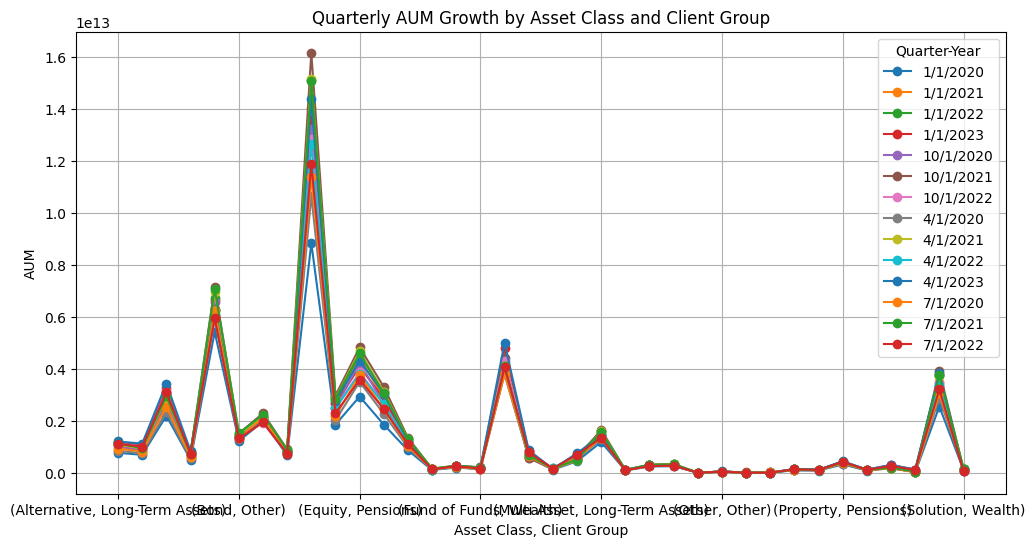

In [15]:
#creating an instance for Canada and then outputting it to ensure it works
pivot_canada = schrodersmethods.Methods.asset_class_pivot(dataset,'Canada')
print(pivot_canada.tail(2))

schrodersmethods.Methods.line_graph_asset_class(pivot_canada)

Let's repeat the methodology for the cumulative NetFlows going into the different Product Display Lens with the necessary filters for


1.   Client Group
2.   Channel
3.   Fund Strategy



Like before we create a pivot table

In [16]:
netflow = schrodersmethods.Methods.net_flow_pivot(dataset)
netflow

,NetFlow
0,3.788038e+05
1,3.259894e+07
4,0.000000e+00
5,3.505043e+04
6,6.984355e+06
...,...
153007,7.906226e+10
153009,8.094212e+09
153010,1.301082e+11
153011,7.906226e+10


Now it is time to create the line graph

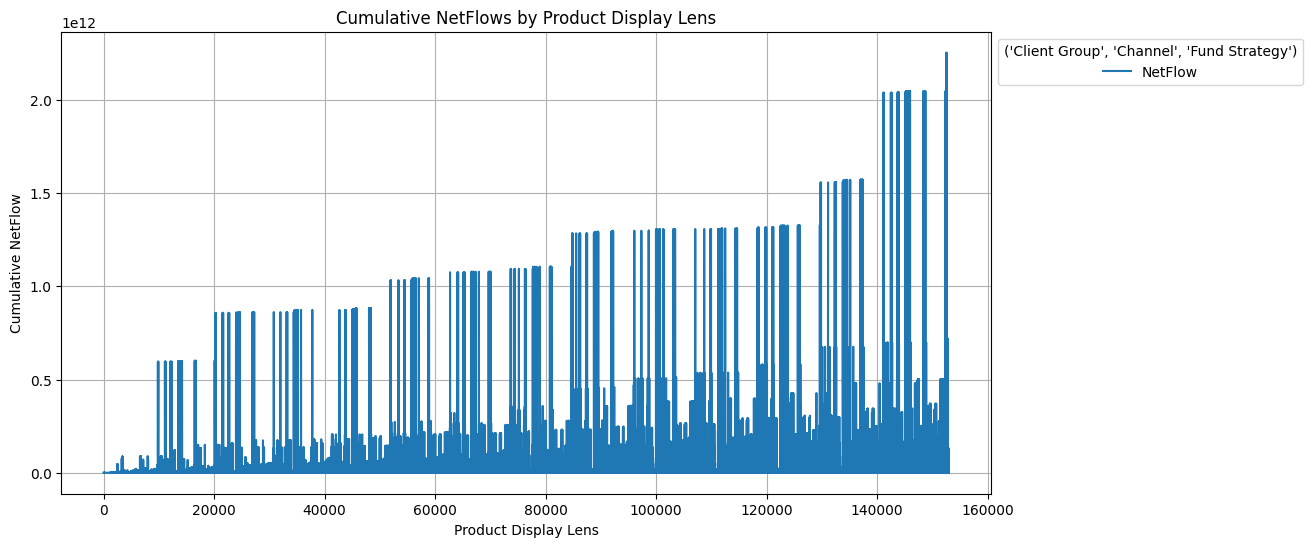

In [17]:
#netflow will be our pivot table parameter
schrodersmethods.Methods.line_graph_net_flow(netflow)

Now we will create a heatmap that can easily identify the Channel with the largest latest AUM by the Product Display Lens. We will add a filter for the Fund Strategy, yet like always it is necessary to create another pivot table

In [26]:
#For this instance we will use a filter Fund Strategy key value of active to test if it works
hmPivot =schrodersmethods.Methods.heatmap_pivot(dataset,'Passive')

In [29]:
#Now to create the heatmap
try:
  schrodersmethods.Methods.create_heatmap(hmPivot)
except:
 print("No data to display")

No data to display


<Figure size 1200x800 with 0 Axes>